# Manejo de clustering basado en densidad
---

### Daniel Marín López

### Ejercicio
Aplicar los algoritmos DBSCAN y DPC a los datos sintéticos que se proporcionan. Comparad el resultado obtenido con el real.

### Importación de librerías

In [1]:
!pip install pydpc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydpc: filename=pydpc-0.1.3-cp311-cp311-linux_x86_64.whl size=252425 sha256=37217904961a26b907ec2b0e8f43ec6cadd92b94922f13bea5e04b3ba20c7e09
  Stored in directory: /root/.cache/pip/wheels/80/10/90/19dfe60b973612ce1865d872779b534264fd187995f84e0f90
Successfully built pydpc


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pydpc

### 1. Carga de los datos
---

Cargamos los datos.

In [3]:
data = pd.read_csv('synthetic_data3.csv')
data_real = pd.read_csv('synthetic_data3_with_labels.csv')
data.head()

,X1,X2
0,1.608417,1.685171
1,2.312804,-1.243635
2,2.676850,-1.740977
3,-1.238309,0.764010
4,-1.936576,-2.845153


### 2. Escalado
---

Esclamos los datos.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

### 3. Visualización
---

Y visualizamos nuestro datos.

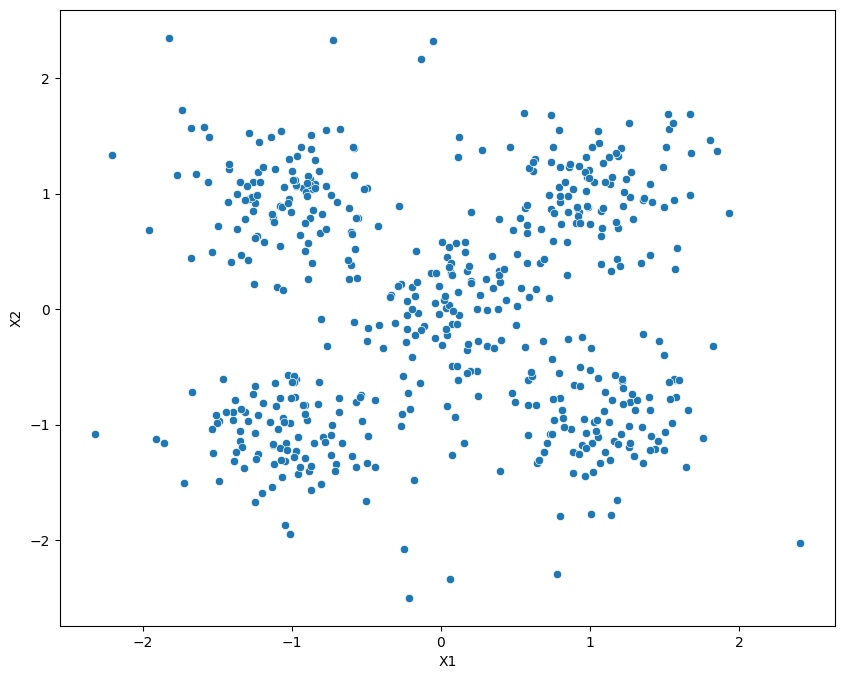

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='X1', y='X2')
plt.show()

A primera vista, podemos notar que hay 5 grupos en nuestro conjunto.

### 4. DBSCAN
---

DBSCAN es un algoritmo de clustering que agrupa puntos de datos basados en su densidad. Es por ello que se encuentra dentro de los algoritmos de clustering basados en densidad porque agrupa puntos que están estrechamente relacionados y marca como valores atípicos los puntos que se encuentran solos en regiones de baja densidad.

DBSCAN tiene dos hiperparámetros:

* `epsilon`: El radio de vecindad de un punto.
* `minPts`: El nº mínimo de puntos dentro de dicho radio para que un punto sea un punto central.

Para este ejemplo se han probado muchos intentos y decidí dejar `epsilon` en 0.2 y `minPts` en 10 que daban un resultado de 5 clústeres.

In [6]:
minPts = 10
epsilon = 0.20

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 5


Imprimimos los labels.

In [7]:
labels

array([ 0,  1,  1, -1,  2,  2,  3,  3,  1,  3,  0, -1, -1, -1,  4,  1,  0,
        0,  4,  4,  4, -1,  0,  3,  4,  1,  0, -1,  1,  1,  4,  3, -1,  4,
       -1,  0, -1,  2, -1,  1,  2,  0,  2,  2,  1, -1,  4,  4,  3,  3,  3,
       -1,  3,  1,  2,  2, -1,  2, -1,  4,  0,  1,  4, -1,  0,  3, -1,  3,
        0,  0,  0, -1, -1,  1,  2, -1,  2, -1,  0,  4, -1,  0,  3, -1, -1,
        2, -1,  4,  0,  0, -1,  3, -1, -1,  2, -1, -1,  1, -1,  2,  0,  3,
        1,  3, -1, -1,  1, -1,  4, -1,  1,  2,  1,  2,  3,  2,  0,  4,  1,
       -1,  1,  1,  0,  2, -1, -1, -1,  3, -1,  1, -1, -1,  3, -1,  1,  3,
       -1,  4, -1,  4, -1,  1,  3,  0,  2,  3,  3,  3,  2, -1,  4,  1,  4,
        4, -1,  3,  2,  2,  4, -1, -1,  0,  1,  3,  4,  0,  1,  1,  2, -1,
       -1, -1, -1,  2,  0,  1,  2,  1,  2,  4,  3,  4, -1,  4, -1,  3,  2,
        0,  1,  4, -1,  4, -1, -1,  3,  1,  0, -1,  2,  0,  4,  1,  1,  0,
       -1,  3,  2,  4,  3,  0,  3,  3,  1,  2,  1,  1, -1,  1, -1,  0,  2,
        2,  0,  3,  2,  3

Y visualizmos los resultados.

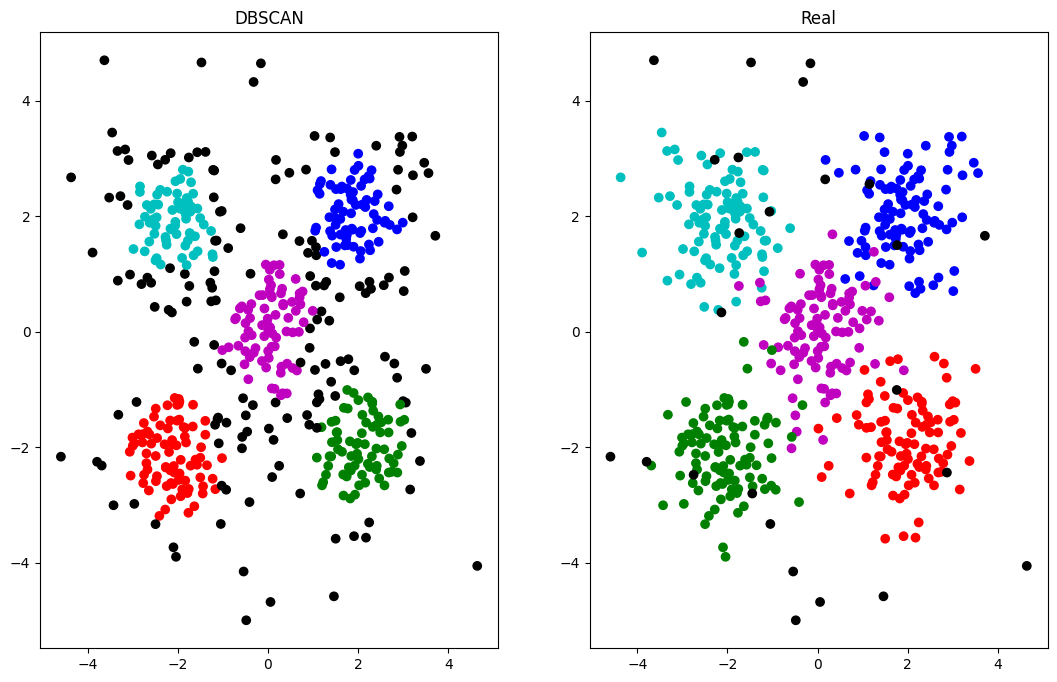

In [8]:
colores = 'bgrcmyk'

plt.figure(figsize=(13, 8))

plt.subplot(1,2,1)
plt.title('DBSCAN')
plt.scatter(data['X1'], data['X2'], c=[colores[i] for i in labels])

plt.subplot(1,2,2)
plt.title('Real')
plt.scatter(data_real['X1'], data_real['X2'], c=[colores[i] for i in data_real['Cluster']])
plt.show()

Vemos que los clústeres se han hecho bien, pero muchos puntos quedan marcados como outliers.

### 5. DPC
---

DPC es un algoritmo de clustering basado en la idea de que los centros de los clústeres tienen una densidad más alta que sus vecinos y están relativamente lejos de otros puntos con alta densidad.

El algoritmo sigue los siguientes pasos:

1. **Cálculo de la densidad local**: Para cada punto de datos, se calcula su densidad local.
2. **Cálculo de la distancia al punto de mayor densidad**: Para cada punto de datos, se calcula la distancia a su vecino con mayor densidad.
3. **Identificación de los centros de los clústeres**: Los puntos de datos con alta densidad local y una gran distancia a otros puntos de alta densidad se consideran centros de clústeres.
4. **Asignación de los puntos de datos restantes a los clústeres**: Los puntos de datos restantes se asignan al clúster del centro más cercano.



#### 1. Cálculo de densidades y distancias mínimas

Al ejecutar el algoritmo, este realizará el cálculo de las densidades y las distancias mínimas. Debido a que ha habido problemas para poner la matriz. He usado la función `np.ascontiguousarray` que se utiliza para crear una nueva vista contigua de una matriz (array) existente. `np.ascontiguousarray` garantiza que una matriz esté almacenada de forma contigua en la memoria, lo que puede mejorar la eficiencia de algunas operaciones.

En el código, se usa dentro de la función `pydpc.Cluster`. Esto se hace para asegurarse de que la matriz `X_scaled` esté almacenada de forma contigua antes de ser utilizada por la biblioteca DPC.

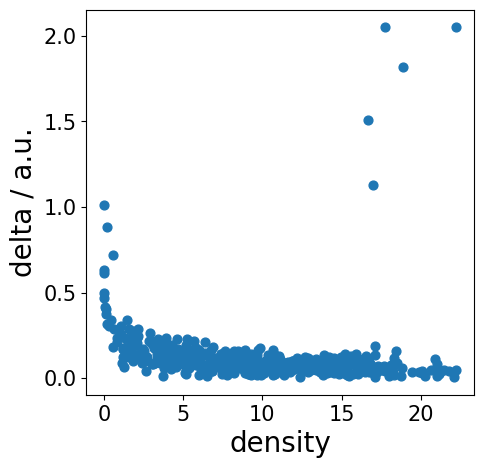

In [9]:
clu = pydpc.Cluster(np.ascontiguousarray(X_scaled))

Podemos notar que hay 5 puntos con una alta densidad y una distancia mayor a las de sus vecinos más cercanos. Estos pueden ser nuestros centroides.

#### 3. Identificación de los centroides

Tras identificar los centroides, debemos definir los valores de $\rho$ (*rho*) y $\delta$ (*delta*) que nos van a permitir definir una frontera. La frontera que indicará cuales son los centroides de cada clúster. En este caso, $\rho=10$ y $\delta=1.0$ son suficientes para trazar la frontera.

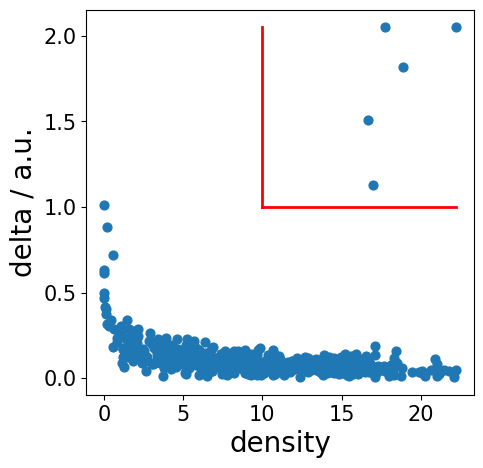

In [ ]:
np.bool = bool # Deprecated

rho = 10
delta = 1.0
clu.assign(rho, delta)

Tras eso, imprimimos los centroides obtenidos.

In [ ]:
cluster_centers = clu.clusters
cluster_centers

array([ 73, 101, 183, 224, 233], dtype=int32)

#### 4. Asignación de los puntos de datos restantes a los clústeres

Lo último es asignar los el resto de puntos al centroide más cercano, para ello creamos los labels respectivos para cada punto.

In [ ]:
labels_dpc = clu.membership
labels_dpc

array([4, 0, 0, 1, 3, 3, 1, 1, 0, 1, 4, 1, 4, 0, 2, 0, 4, 4, 2, 2, 2, 2,
       4, 1, 2, 0, 4, 1, 0, 0, 2, 1, 1, 2, 2, 4, 4, 3, 2, 0, 3, 4, 3, 3,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 4, 2, 4, 0, 2, 1, 4, 1,
       1, 1, 4, 4, 4, 0, 4, 0, 3, 2, 3, 2, 4, 2, 2, 4, 1, 4, 2, 3, 1, 2,
       4, 4, 1, 1, 4, 1, 3, 1, 4, 0, 0, 3, 4, 1, 0, 1, 4, 1, 0, 4, 2, 2,
       0, 3, 0, 3, 1, 3, 4, 2, 0, 1, 0, 0, 4, 3, 1, 0, 2, 1, 2, 0, 3, 4,
       1, 0, 0, 1, 1, 2, 4, 2, 0, 0, 1, 4, 3, 1, 1, 1, 3, 4, 2, 0, 2, 2,
       4, 1, 3, 3, 2, 3, 4, 4, 0, 1, 2, 4, 0, 0, 3, 1, 3, 4, 4, 3, 4, 0,
       3, 0, 3, 2, 1, 2, 1, 2, 0, 1, 3, 4, 0, 2, 2, 2, 3, 1, 1, 0, 4, 2,
       3, 4, 2, 0, 0, 4, 4, 1, 3, 2, 1, 4, 1, 1, 0, 3, 0, 0, 3, 0, 2, 4,
       3, 3, 4, 1, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4, 2, 4, 0, 0, 4, 0, 3, 3,
       1, 2, 0, 1, 4, 3, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 0, 0, 3, 2, 1, 2,
       3, 0, 0, 2, 3, 0, 2, 2, 1, 2, 0, 2, 3, 1, 2, 4, 1, 3, 0, 4, 0, 3,
       2, 2, 0, 2, 2, 1, 2, 4, 1, 3, 2, 2, 4, 4, 3,

#### 5. Visualizamos los resultados

Visualizamos el resultado final.

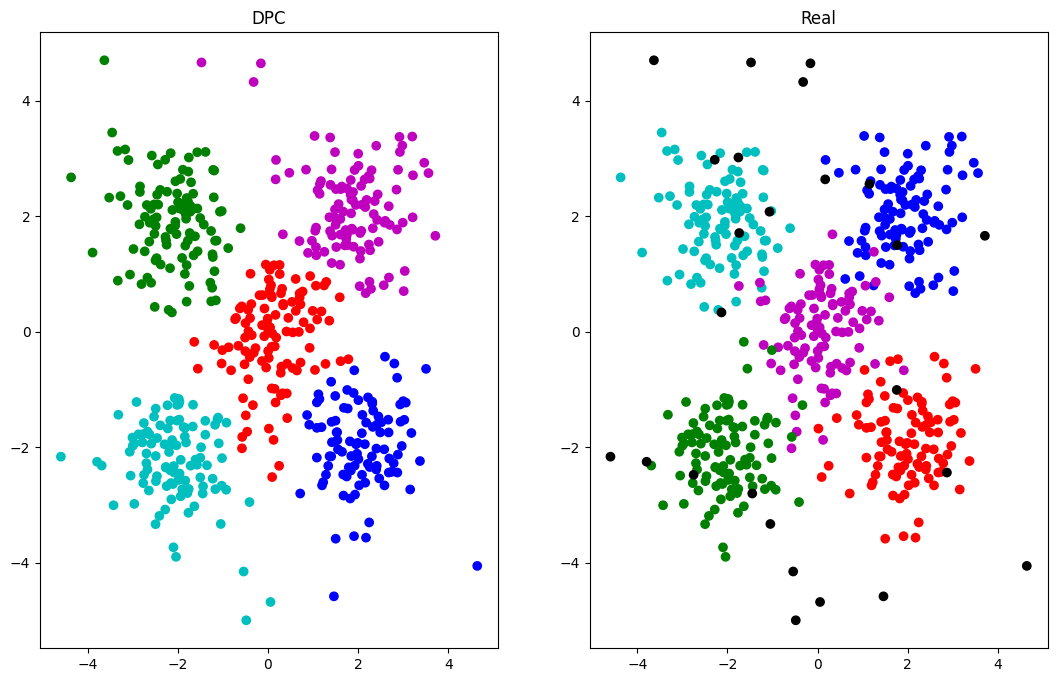

In [ ]:
colores = 'bgrcmyk'

plt.figure(figsize=(13, 8))

plt.subplot(1,2,1)
plt.title('DPC')
plt.scatter(data['X1'], data['X2'], c=[colores[i] for i in labels_dpc])

plt.subplot(1,2,2)
plt.title('Real')
plt.scatter(data_real['X1'], data_real['X2'], c=[colores[i] for i in data_real['Cluster']])
plt.show()

Vemos que este resultado es mucho más parecido que el de DBSCAN sin marcar apenas outliers.